# PREDICTING THE PRICE OF HOUSING FOR HASS REAL ESTATE COMPANY

#1. Defining the question


As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. 

You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 

Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

## a) Specifying the question

Using the information given on the real estate properties that was collected over the past few weeks, What are the factors that affect housing prices?

## b) Defining the metric of success 

To be able to create a suitable model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

## c) Understanding the context

We have been provided with one dataset that provide us with values of our variables, both the dependent ('price'), and other independent /predictor variables.

The dataset has 1 response variable and 19 predictor variables. We will design and test our model using these predictor variables until we are able to come up with the optimal model.

## d) Recording the experimental design

i) Perform EDA

ii) Perform univariate, bivariate and multivariate analysis recording your observations

iii) Check for multicollinearity


iv) Performing regression analysis and create different models

*   Multiple Linear Regression
*   Quantile Regression
*   Ridge Regression
*   Lasso Regression
*   Elastic Net Regression

v) Create residual plots for the models and assess heteroskedasticity using Barlett's test.

vi) Recommendation based on your analysis. 




## e) Data Revelance

The dataset features are described below.

### **Column descriptions**

Id - unique record identifier

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15


Lasso Regression
 
Incorporate categorical independent variables into your models.
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.
While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

#2. Reading Data

#Loading Libraries

In [ ]:
# importing our libraries

#pandas libraries
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

# Multiple Linear regression libraries
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

#quantile regression
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 

# # Finding the regression coefficients for the conditioned median, 0.5 quantile
# #
# mod = smf.quantreg('y ~ x', data)
# res = mod.fit(q=.5)

# Then print out the summary of our model
#
# print(res.summary())


# Ridge regression libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
import statsmodels.formula.api as smf

# Lasso regression libraries
from sklearn.linear_model import Lasso
from sklearn.datasets import load_boston


#Elastic net regression




#Loading the dataset

In [ ]:
# loading the dataset

house = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

In [ ]:
# previewing

house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# Exploratory Data Analysis

In [ ]:
# checking the columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# checking the shape
house.shape

#the dataset has 21613 rows and 20 columns

(21613, 20)

In [ ]:
# Checking the information of the objects 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [ ]:
# getting the summary statistics of the numerical data
house.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
# checking for null values

house.isnull().sum()

# there are no missing values

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
# checking for duplicated values

house.duplicated().sum()

# there are 3 duplicates
# we will drop these as they are very few 

3

In [ ]:
# We drop duplicates by setting the column 'id' as our subset
# This is because it uniquely identifies the rows

house.drop_duplicates(subset ="id", keep = False, inplace = True)


In [ ]:
# previweing the shape of the dataframe after dropping duplicates

house.shape

(21260, 20)

In [ ]:
# Checking how many records have been lost

21613-21260

# we have lost 353 records

353

## Univariate Analysis

In [ ]:
# previewing the head our dataset 
house.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
# previewing the tail of our dataset
house.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# checking for multicollinearity
house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.020180,0.000392,0.003602,-0.014627,-0.133574,0.017637,-0.002767,0.010275,-0.024646,0.004809,-0.012792,-0.006407,0.020521,-0.017438,-0.007770,-0.003818,0.018162,-0.005203,-0.140532
price,-0.020180,1.000000,0.309871,0.524782,0.701389,0.087799,0.254446,0.267518,0.396291,0.033369,0.666414,0.604555,0.323758,0.049990,0.127301,-0.049954,0.305722,0.018317,0.583244,0.081248
bedrooms,0.000392,0.309871,1.000000,0.517678,0.578373,0.031738,0.174991,-0.006787,0.079556,0.027345,0.359853,0.479303,0.302984,0.153312,0.018026,-0.154612,-0.011542,0.130218,0.394718,0.028991
bathrooms,0.003602,0.524782,0.517678,1.000000,0.754187,0.086547,0.499077,0.063725,0.185623,-0.130592,0.664500,0.684649,0.283332,0.504157,0.051475,-0.202117,0.022317,0.220845,0.567780,0.086081
sqft_living,-0.014627,0.701389,0.578373,0.754187,1.000000,0.171084,0.351785,0.103985,0.282888,-0.063120,0.762094,0.876773,0.433805,0.315029,0.054808,-0.197860,0.049702,0.238217,0.755999,0.182266
sqft_lot,-0.133574,0.087799,0.031738,0.086547,0.171084,1.000000,-0.006701,0.021539,0.075318,-0.009620,0.111454,0.181645,0.014933,0.051810,0.007630,-0.129254,-0.086301,0.229594,0.142689,0.717635
floors,0.017637,0.254446,0.174991,0.499077,0.351785,-0.006701,1.000000,0.023245,0.026967,-0.269250,0.456775,0.521404,-0.246403,0.488804,0.004909,-0.057138,0.048951,0.123157,0.277837,-0.012566
waterfront,-0.002767,0.267518,-0.006787,0.063725,0.103985,0.021539,0.023245,1.000000,0.404204,0.016565,0.082905,0.071966,0.081092,-0.026918,0.093166,0.030827,-0.014516,-0.042466,0.086654,0.030686
view,0.010275,0.396291,0.079556,0.185623,0.282888,0.075318,0.026967,0.404204,1.000000,0.044120,0.248435,0.166206,0.276016,-0.056885,0.103347,0.089375,0.005183,-0.081047,0.277701,0.073164
condition,-0.024646,0.033369,0.027345,-0.130592,-0.063120,-0.009620,-0.269250,0.016565,0.044120,1.000000,-0.151642,-0.163294,0.174872,-0.368435,-0.061636,0.005853,-0.015831,-0.108989,-0.097074,-0.004037


In [ ]:
# columns
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
house.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

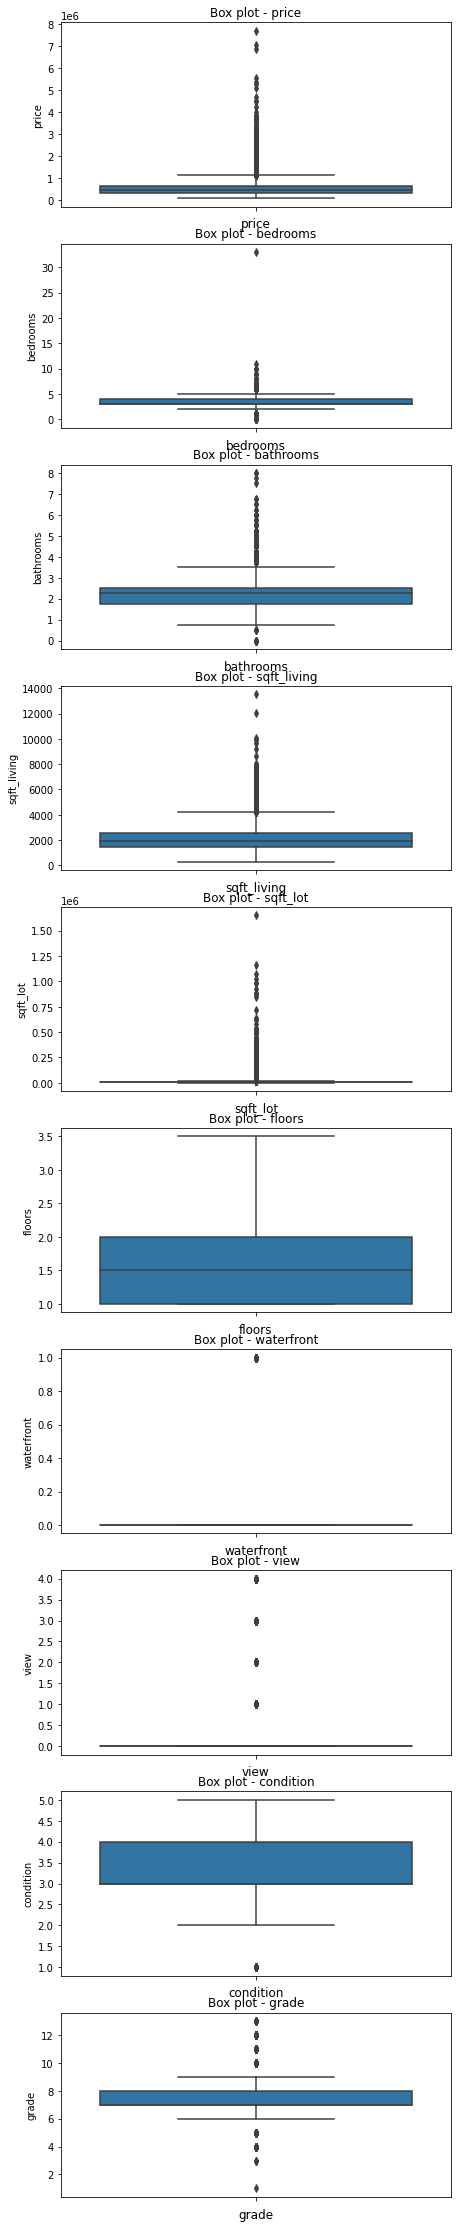

In [66]:
#Plot a box plot to check for outliers

col_names1 = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
             'view', 'condition', 'grade']

fig,ax = plt.subplots(len(col_names1),figsize=(7,40))
for i , col_val in enumerate(col_names1):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =12)
  ax[i].set_xlabel(col_val,fontsize=12)
plt.show()

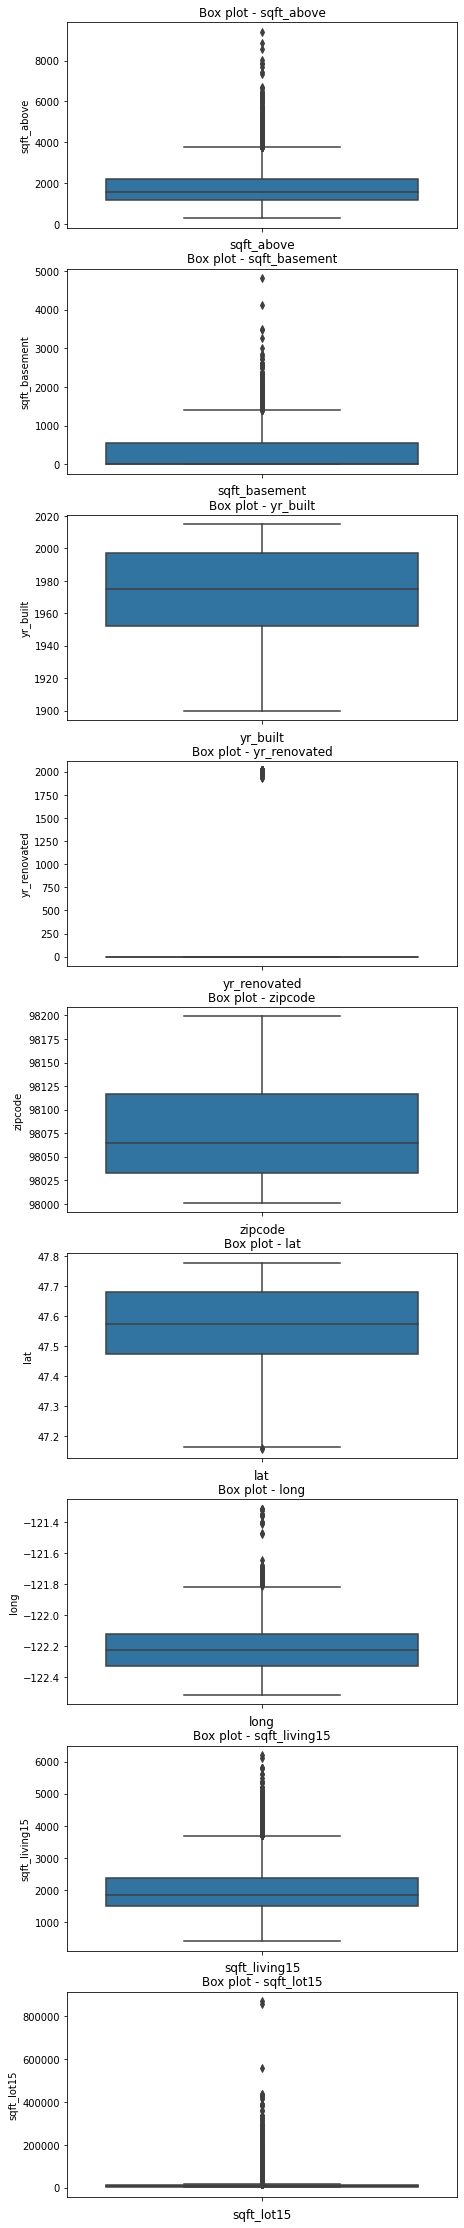

In [67]:
col_names = ['sqft_above','sqft_basement', 'yr_built', 'yr_renovated', 
             'zipcode', 'lat', 'long','sqft_living15', 'sqft_lot15']

fig,ax = plt.subplots(len(col_names),figsize=(7,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=house[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =12)
  ax[i].set_xlabel(col_val,fontsize=12)
plt.show()

Exploring our target variable

In [ ]:
# checking out target variable
house['price'].unique()

array([221900., 538000., 180000., ..., 541800., 610685., 402101.])

In [ ]:
# checking the distribution of price 
house['price'].value_counts()

450000.0    171
350000.0    167
550000.0    154
500000.0    150
425000.0    149
           ... 
653450.0      1
826600.0      1
613200.0      1
169900.0      1
402101.0      1
Name: price, Length: 3583, dtype: int64

In [ ]:
# checking the mean of price 
house['price'].mean()

542183.3717309502

In [ ]:
# checking the mode of price 
house['price'].mode()

0    450000.0
dtype: float64

In [ ]:
# checking the median of price 
house['price'].median()

451000.0